# **Importing Libraries**

In [6]:
import yfinance as yf
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# **Loading Data From Yahoo finance**

In [7]:
ticker = "AAPL"
data = yf.download(ticker, start="2015-01-01", end="2024-12-31")

/tmp/ipython-input-7-1755532821.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start="2015-01-01", end="2024-12-31")
[*********************100%***********************]  1 of 1 completed


> Shift the Close column by -1 to get next day's close as the prediction target


In [8]:
data['Next_Close'] = data['Close'].shift(-1)


In [9]:
# Drop the last row with NaN target
data = data.dropna()

In [10]:
# Features: Open, High, Low, Volume
X = data[['Open', 'High', 'Low', 'Volume']]
y = data['Next_Close']

# **Train Test Split**

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


# **Training The Model**

In [16]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

# **Making Predictions**

In [17]:
y_pred = model.predict(X_test)


> Evaluating

In [18]:
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

Mean Squared Error: 900.95


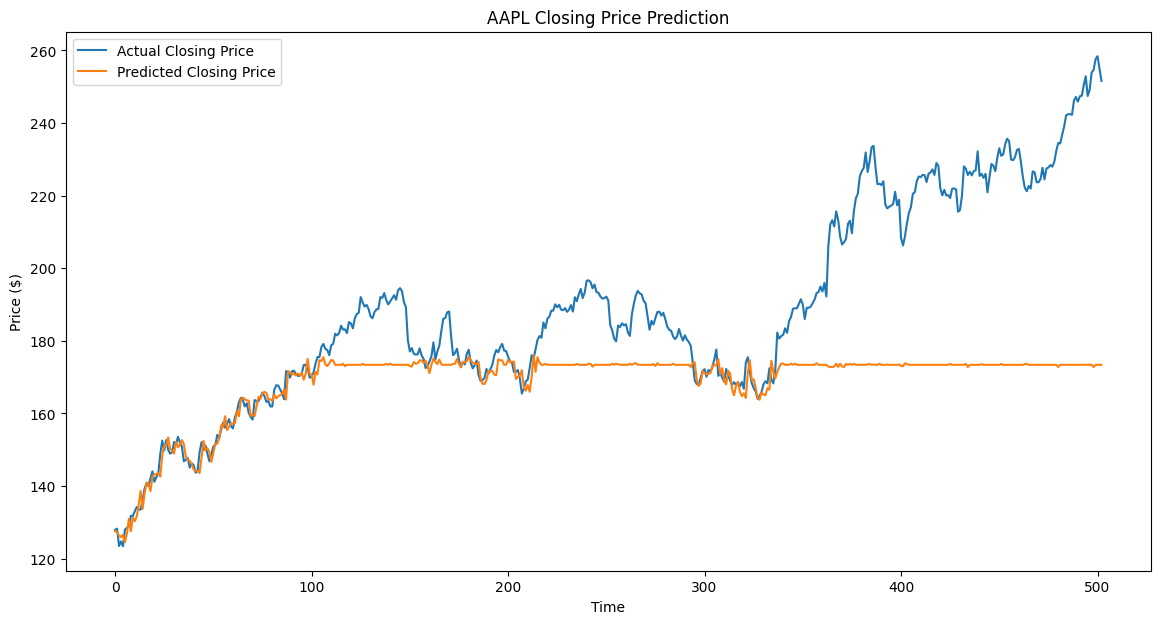

In [19]:
plt.figure(figsize=(14, 7))
plt.plot(y_test.values, label='Actual Closing Price')
plt.plot(y_pred, label='Predicted Closing Price')
plt.title(f'{ticker} Closing Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price ($)')
plt.legend()
plt.show()

# **Now predictig Tesla Stock**

In [20]:
ticker = "TSLA"
data = yf.download(ticker, start="2015-01-01", end="2024-12-31")

/tmp/ipython-input-20-2991140104.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start="2015-01-01", end="2024-12-31")
[*********************100%***********************]  1 of 1 completed


In [21]:
# Next day's close
data['Next_Close'] = data['Close'].shift(-1)
data = data.dropna()

# Features
X = data[['Open', 'High', 'Low', 'Volume']]
y = data['Next_Close']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)

> **Applying Linear Regression**

In [23]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [24]:
y_pred = model.predict(X_test)


In [25]:
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

Mean Squared Error: 79.47


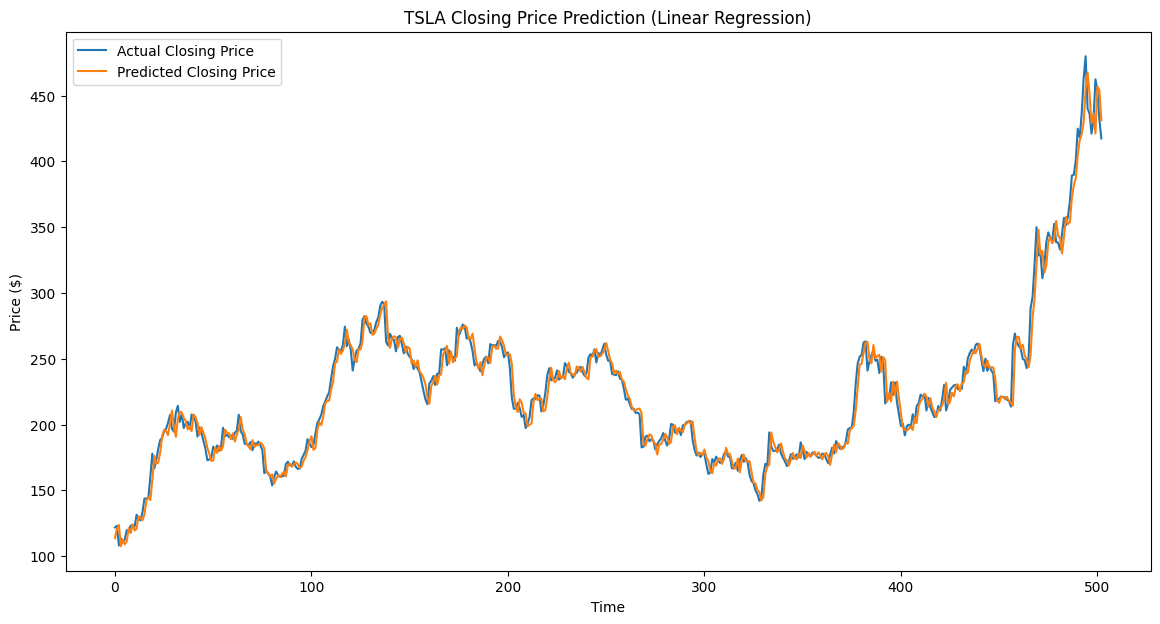

In [26]:
plt.figure(figsize=(14, 7))
plt.plot(y_test.values, label='Actual Closing Price')
plt.plot(y_pred, label='Predicted Closing Price')
plt.title(f'{ticker} Closing Price Prediction (Linear Regression)')
plt.xlabel('Time')
plt.ylabel('Price ($)')
plt.legend()
plt.show()

# Conclusion

The Linear Regression on tesla closing price pridicts much better than the reletavely advance Random Forest